In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data= keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) =data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape,train_labels.shape

((60000, 28, 28), (60000,))

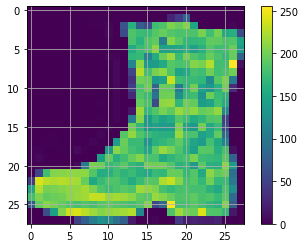

In [10]:
plt.figure()
plt.imshow(train_images[150])
plt.colorbar()
plt.grid()

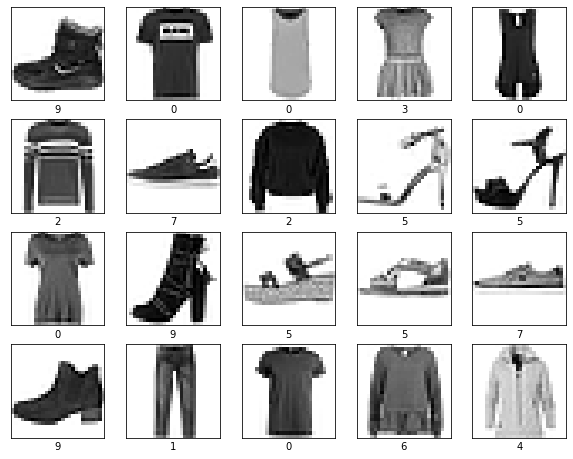

In [11]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [12]:
train_images=train_images.reshape(-1,28,28,1).astype('float32')/255
test_images=test_images.reshape(-1,28,28,1).astype('float32')/255

In [14]:
test_images.shape

(10000, 28, 28, 1)

In [15]:
train_images=train_images.astype('float32')
train_labels=train_labels.astype('float32')

In [19]:
train_images = train_images[:-10000]
train_labels = train_labels[:-10000]
val_images=train_images[-10000:]
val_labels=train_labels[-10000:]

In [20]:
val_images.shape

(10000, 28, 28, 1)

In [22]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [27]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [29]:
model.fit(train_images,train_labels,epochs=10,validation_data=(val_images,val_labels))

Epoch 1/10
1250/1250 [==============================] - 23s 19ms/step - loss: 0.4540 - accuracy: 0.8420 - val_loss: 0.3136 - val_accuracy: 0.8959
Epoch 2/10
1250/1250 [==============================] - 23s 19ms/step - loss: 0.3057 - accuracy: 0.8908 - val_loss: 0.2556 - val_accuracy: 0.9067
Epoch 3/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.2597 - accuracy: 0.9069 - val_loss: 0.2272 - val_accuracy: 0.9221
Epoch 4/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.2278 - accuracy: 0.9178 - val_loss: 0.2114 - val_accuracy: 0.9255
Epoch 5/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.2004 - accuracy: 0.9275 - val_loss: 0.1872 - val_accuracy: 0.9335
Epoch 6/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.1781 - accuracy: 0.9326 - val_loss: 0.1570 - val_accuracy: 0.9453
Epoch 7/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.1588 - accuracy: 0.9421 - val_loss: 0.1243 -

In [30]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 2s - loss: 0.2943 - accuracy: 0.9100
